In [12]:
using Pkg
Pkg.activate(".")
using Plots
using LinearAlgebra




  Activating project at `c:\Users\610mo\Desktop\NumericalNavier\MelvinFolder`


In [13]:
## variable declarations
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

## initial conditions
p = zeros(Float64, ny, nx)

## plotting aids
x = LinRange(0, 2, nx)
y = LinRange(0, 1, ny)

## boundary conditions
p[:, 1] .= 0.0           # p = 0 @ x = 0
p[:, end] .= y           # p = y @ x = 2
p[1, :] .= p[2, :]       # dp/dy = 0 @ y = 0
p[end, :] .= p[end-1, :]; # dp/dy = 0 @ y = 1


In [14]:
function plot2D(x, y, p)
    plot(x, y, p, st=:surface, camera=(-45, 45), color=:viridis)
    xlabel!("x")
    ylabel!("y")
    zlabel!("z")
end


plot2D (generic function with 1 method)

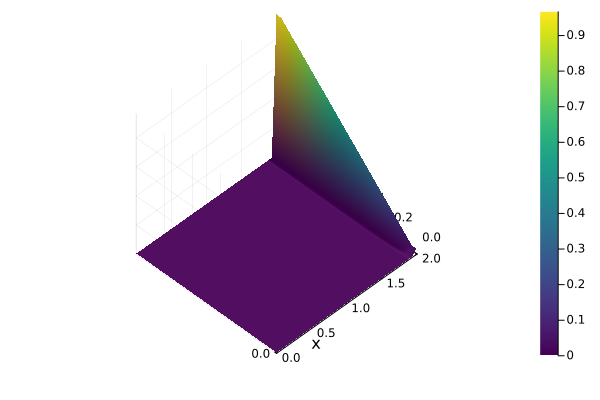

In [15]:
plot2D(x, y, p)

In [16]:

function laplace2d(p, y, dx, dy, l1norm_target)
    l1norm = 1.0
    pn = similar(p)
    
    anim = @animate while l1norm > l1norm_target
        copyto!(pn, p)
        p[2:end-1, 2:end-1] .= (dy^2 * (pn[2:end-1, 3:end] + pn[2:end-1, 1:end-2]) +
                                dx^2 * (pn[3:end, 2:end-1] + pn[1:end-2, 2:end-1])) /
                            (2 * (dx^2 + dy^2))

        p[:, 1] .= 0 # p = 0 @ x = 0
        p[:, end] .= y # p = y @ x = 2
        p[1, :] .= p[2, :] # dp/dy = 0 @ y = 0
        p[end, :] .= p[end-1, :] # dp/dy = 0 @ y = 1

        l1norm = sum(abs.(p .- pn)) / sum(abs.(pn))
        plot2D(x, y, p)
    end
    gif(anim, "laplace_solution.gif", fps = 60)  # Save the animation as a GIF file
    return p
end


laplace2d (generic function with 1 method)

In [17]:
p = laplace2d(p, y, dx, dy, 1e-4)

┌ Info: Saved animation to c:\Users\610mo\Desktop\NumericalNavier\MelvinFolder\laplace_solution.gif
└ @ Plots C:\Users\610mo\.julia\packages\Plots\ju9dp\src\animation.jl:156


31×31 Matrix{Float64}:
 0.0  0.0118911  0.0237594  0.0355815  …  0.11852   0.0842303  0.0333333
 0.0  0.0118911  0.0237594  0.0355815     0.11852   0.0842303  0.0333333
 0.0  0.0119298  0.0238373  0.0356994     0.128512  0.100854   0.0666667
 0.0  0.0120067  0.023992   0.0359339     0.145005  0.124022   0.1
 0.0  0.0121209  0.0242218  0.0362821     0.16552   0.150244   0.133333
 0.0  0.012271   0.0245238  0.0367397  …  0.188586  0.178118   0.166667
 0.0  0.0124551  0.0248943  0.0373011     0.213342  0.206991   0.2
 0.0  0.0126711  0.025329   0.0379597     0.239265  0.236518   0.233333
 0.0  0.0129164  0.0258225  0.0387074     0.266021  0.266498   0.266667
 0.0  0.0131881  0.0263691  0.0395355     0.293386  0.296804   0.3
 ⋮                                     ⋱                       ⋮
 0.0  0.0174366  0.0349162  0.052482      0.661383  0.697187   0.733333
 0.0  0.0176819  0.0354098  0.0532298     0.688139  0.727168   0.766667
 0.0  0.0178979  0.0358445  0.0538883     0.714062  0.756695

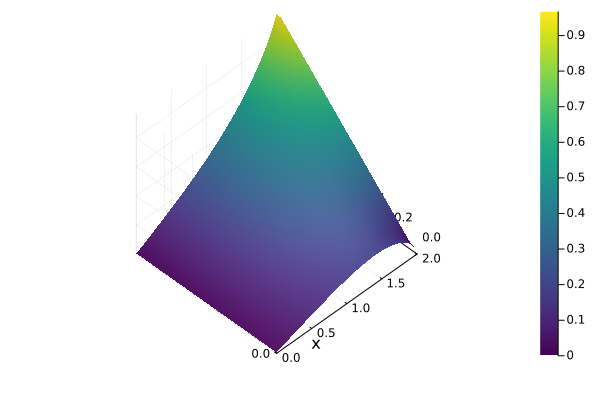

In [18]:
plot2D(x, y, p)